# Strength of Friendship Paradox - Email Script
This notebook processes EU institution email data from Leskovec et al. (2006). 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from collections import Counter
from math import log10
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# read data
d_name = 'EU'
df = pd.read_csv('../strength-friendship-paradox/data/email/eu_email_edgelist_weighted.csv', sep=',')

In [6]:
df

,from,to,weight
0,1,1,4
1,1,104,1
2,1,108,2
3,1,114,4
4,1,122,2
...,...,...,...
75996,99,821,1
75997,99,842,1
75998,99,87,3
75999,99,927,1


it seems a bit of data cleaning is necessary:
- change column names
- remove self-loops

In [7]:
# change column names
df = df.rename(columns = {'from':'node1','to': 'node2','weight':'w'})

# remove self-loops
df = df.loc[df['node1']!=df['node2'],]
df

,node1,node2,w
1,1,104,1
2,1,108,2
3,1,114,4
4,1,122,2
5,1,129,2
...,...,...,...
75996,99,821,1
75997,99,842,1
75998,99,87,3
75999,99,927,1


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

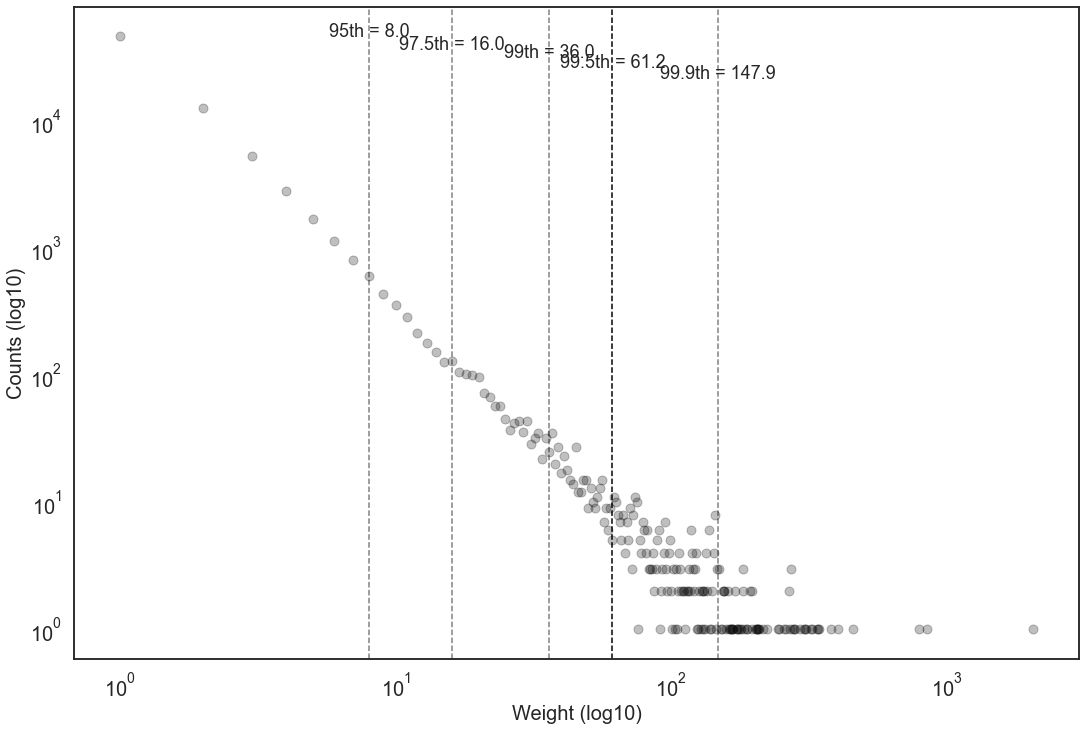

In [9]:
# creae the weight distribution
dist_df = pd.DataFrame(list(Counter(df.w).items()))
# dist_df = dist_df.applymap(log10)
dist_df.columns = ["weight", "counts"]

# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
# sns.lmplot(x="weight", y="counts", data=dist_df, scatter=True)
               #markers='.', scatter_kws={"s": 10})
sns.regplot(x="weight", y="counts", data=dist_df,fit_reg=False, 
            color = '#000000', scatter_kws={'alpha':0.25})
plt.axvline(x=df['w'].quantile(.95),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.95),dist_df['counts'].max(), '95th = {:.1f}'.format(df['w'].quantile(.95)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.975),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.975),dist_df['counts'].max()-10000, '97.5th = {:.1f}'.format(df['w'].quantile(.975)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.99),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.99),dist_df['counts'].max()-15000, '99th = {:.1f}'.format(df['w'].quantile(.99)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.995),
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.995),dist_df['counts'].max()-20000, '99.5th = {:.1f}'.format(df['w'].quantile(.995)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.999),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.999),dist_df['counts'].max()-25000, '99.9th = {:.1f}'.format(df['w'].quantile(.999)),fontsize=18,ha='center')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Weight (log10)', fontsize = 20)
plt.ylabel('Counts (log10)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# # g.set_axis_labels("weight (log10)", "counts (log10)")

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

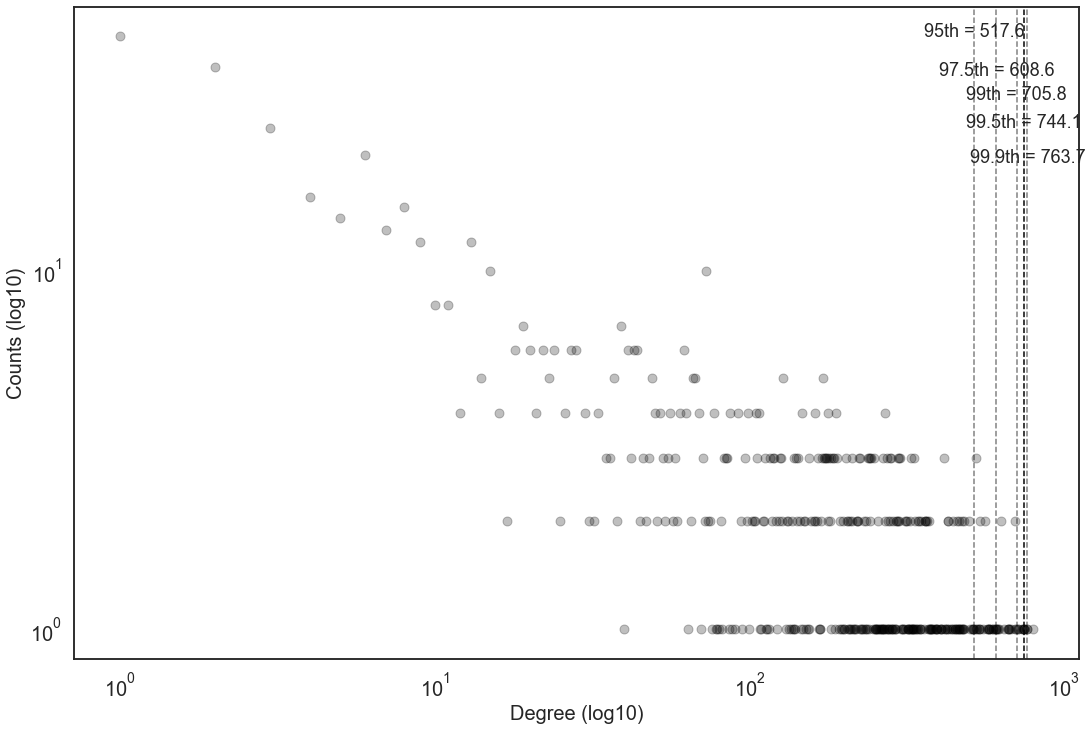

In [12]:
# degree distribution
A_degree = pd.DataFrame(list(Counter(df.loc[:,'node1'].append(df.loc[:,'node2'])).items()))
A_degree.columns = ["node", "degree"]
A_df = pd.DataFrame(list(Counter(A_degree.degree).items()))
A_df.columns = ["degree", "counts"]

# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
# sns.lmplot(x="weight", y="counts", data=dist_df, scatter=True)
               #markers='.', scatter_kws={"s": 10})
sns.regplot(x="degree", y="counts", data=A_df,fit_reg=False, 
            color = '#000000', scatter_kws={'alpha':0.25})
plt.axvline(x=A_degree['degree'].quantile(.95),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.95),A_df['counts'].max(), '95th = {:.1f}'.format(A_degree['degree'].quantile(.95)),fontsize=18,ha='center')
plt.axvline(x=A_degree['degree'].quantile(.975),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.975),A_df['counts'].max()-10, '97.5th = {:.1f}'.format(A_degree['degree'].quantile(.975)),fontsize=18,ha='center')
plt.axvline(x=A_degree['degree'].quantile(.99),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.99),A_df['counts'].max()-15, '99th = {:.1f}'.format(A_degree['degree'].quantile(.99)),fontsize=18,ha='center')
plt.axvline(x=A_degree['degree'].quantile(.995),
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.995),A_df['counts'].max()-20, '99.5th = {:.1f}'.format(A_degree['degree'].quantile(.995)),fontsize=18,ha='center')
plt.axvline(x=A_degree['degree'].quantile(.999),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.999),A_df['counts'].max()-25, '99.9th = {:.1f}'.format(A_degree['degree'].quantile(.999)),fontsize=18,ha='center')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log10)', fontsize = 20) 
plt.ylabel('Counts (log10)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [14]:
def FP(df):
    '''calculate the strength of FP index'''
    fp = 1 + df['std']/df['mean']**2
    return(fp)

def summary_stat(percent = .5, df = df):
    '''
    calculate summary degree stat
    input: percent e.g., .5, .6, 1
    '''
    cutoff = df['w'].quantile(percent)
    # calculate Mean and SD
    def sum_stat(degree_df):
        sum_df = degree_df.agg({'degree':['mean','std','min','max']})
        sum_df = sum_df.T.reset_index(drop=True)
        return(sum_df)
    # separate cases
    if percent == 1:
        # degree calculation
        A_degree = pd.DataFrame(list(Counter(df.loc[:,'node1'].append(df.loc[:,'node2'])).items()))
        A_degree.columns = ["node", "degree"]
        sum_df = sum_stat(A_degree)
        sum_df['type'] = 'All'
        sum_S['n'] = len(A_degree.index)
        sum_df['n%'] = len(A_degree.index)/len(pd.unique(df.iloc[:,0:2].values.ravel('K')))*100
    else:
        # separate Strong vs. Weak
        S_df = df.loc[df.w >= cutoff,:]
        W_df = df.loc[df.w < cutoff,:]
        # degree calculaion
        S_degree = pd.DataFrame(list(Counter(S_df.loc[:,'node1'].append(S_df.loc[:,'node2'])).items()))
        S_degree.columns = ["node", "degree"]
        W_degree = pd.DataFrame(list(Counter(W_df.loc[:,'node1'].append(W_df.loc[:,'node2'])).items()))
        W_degree.columns = ["node", "degree"]
        sum_S = sum_stat(S_degree)
        sum_S['type'] = 'Strong'
        sum_W = sum_stat(W_degree)
        sum_W['type'] = 'Weak'
        sum_S['n'] = len(S_degree.index)
        sum_W['n'] = len(W_degree.index)
        sum_S['n%'] = len(S_degree.index)/len(pd.unique(df.iloc[:,0:2].values.ravel('K')))*100
        sum_W['n%'] = len(W_degree.index)/len(pd.unique(df.iloc[:,0:2].values.ravel('K')))*100
        sum_df = sum_S.append(sum_W)
    # add extra info
    sum_df['percentile'] = percent
    sum_df['cutoff'] = cutoff
    sum_df['country'] = d_name.split(sep='_')[0]
    return(sum_df)

def degree_cutoff(df, cutoff):
    '''
    this method removes nodes that have greater than a cutoff value
    input: df = edgelist dataframe; cutoff = integer like 150 or percentile
    '''
    # calculate degree of each node
    A_degree = pd.DataFrame(list(Counter(df.loc[:,'node1'].append(df.loc[:,'node2'])).items()))
    A_degree.columns = ["node", "degree"]
    if isinstance(cutoff, int):
        print('the cutoff is ',cutoff)
    else:
        # create a cutoff value by percentile
        cutoff = A_degree['degree'].quantile(cutoff)
        print('the cutoff is ',cutoff)
    # make a cut
    A_list = A_degree.loc[A_degree.degree <= cutoff,]
    # select only rows that are part of A_list['node']
    df = df.loc[(df['node1'].isin(A_list['node'].to_list())) & (df['node2'].isin(A_list['node'].to_list())),]
    return(df)

In [15]:
stat_df = pd.concat([summary_stat(percent = x) for x in [.999,.995,.99,.975,.95,.90]])
stat_df['FP'] = FP(stat_df)
stat_df.round(2)

,mean,std,min,max,type,n,n%,percentile,cutoff,country,FP
0,1.69,1.18,1.0,8.0,Strong,90,9.19,1.00,147.87,EU,1.41
0,154.22,169.34,1.0,789.0,Weak,979,100.00,1.00,147.87,EU,1.01
0,2.62,2.29,1.0,18.0,Strong,289,29.52,1.00,61.17,EU,1.34
0,153.60,168.46,1.0,779.0,Weak,979,100.00,1.00,61.17,EU,1.01
0,3.65,3.46,1.0,27.0,Strong,421,43.00,0.99,36.00,EU,1.26
0,152.80,167.40,1.0,770.0,Weak,979,100.00,0.99,36.00,EU,1.01
0,6.87,7.76,1.0,64.0,Strong,569,58.12,0.98,16.00,EU,1.16
0,150.38,163.86,1.0,736.0,Weak,979,100.00,0.98,16.00,EU,1.01
0,12.97,17.57,1.0,137.0,Strong,665,67.93,0.95,8.00,EU,1.10
0,145.57,156.09,1.0,682.0,Weak,979,100.00,0.95,8.00,EU,1.01
